In [78]:
# Setup libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [ ]:
# Prepare data
def load_data(file_path):
    return pd.read_csv(file_path, delimiter=';')

df_math = load_data("student-mat.csv")
df_por = load_data("student-por.csv")

# Merge on the common columns so that we have a more fair comparison
merge_columns = [
    "school", "sex", "age", "address", "famsize", "Pstatus",
    "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"
]

merged_df = pd.merge(df_math, df_por, on=merge_columns,suffixes=("_math","_por"))

In [79]:
merged_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_math,traveltime_math,studytime_math,failures_math,schoolsup_math,famsup_math,paid_math,activities_math,nursery,higher_math,internet,romantic_math,famrel_math,freetime_math,goout_math,Dalc_math,Walc_math,health_math,absences_math,G1_math,G2_math,G3_math,guardian_por,traveltime_por,studytime_por,failures_por,schoolsup_por,famsup_por,paid_por,activities_por,higher_por,romantic_por,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,mother,2,2,0,yes,no,no,no,yes,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,father,1,2,0,no,yes,no,no,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,mother,1,2,0,yes,no,no,no,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,mother,1,3,0,no,yes,no,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,father,1,2,0,no,yes,no,no,yes,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,4,1,1,1,0,7,9,8,mother,1,2,0,no,yes,no,no,yes,no,4,3,4,1,1,1,4,15,15,16
378,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0,mother,3,2,2,no,no,no,yes,yes,yes,3,4,4,2,2,5,3,7,8,7
379,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0,mother,2,2,0,no,no,no,yes,yes,no,1,1,1,1,1,5,6,11,12,9
380,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,mother,2,1,0,no,no,no,no,yes,no,2,4,5,3,4,2,6,10,10,10


# Are students more proficient in math or portugese?

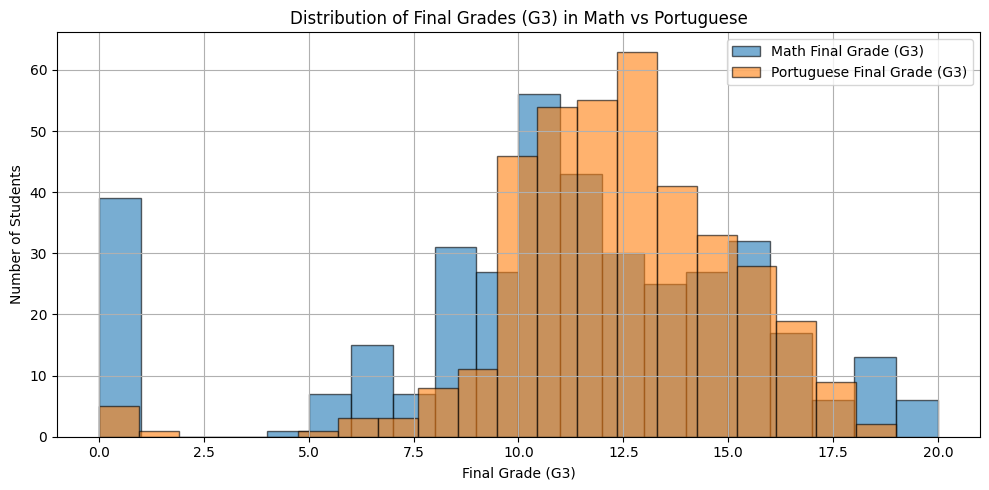

In [49]:
import matplotlib.pyplot as plt

# Set up the plot style and figure
plt.figure(figsize=(10, 5))

# Histogram comparison
plt.hist(merged_df['G3_math'], bins=20, alpha=0.6, label='Math Final Grade (G3)', edgecolor='black')
plt.hist(merged_df['G3_por'], bins=20, alpha=0.6, label='Portuguese Final Grade (G3)', edgecolor='black')

plt.title('Distribution of Final Grades (G3) in Math vs Portuguese')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Same comparison but in a box plot

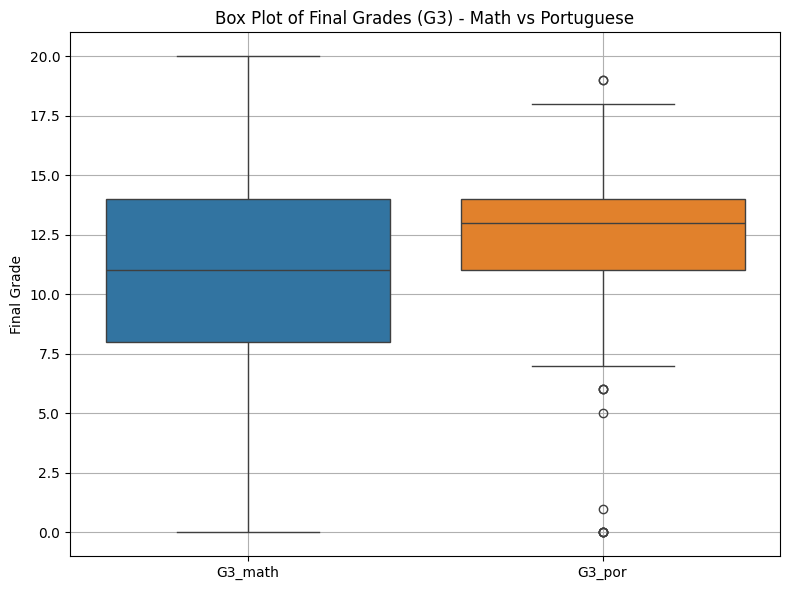

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot comparison of G3 grades
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df[['G3_math', 'G3_por']])
plt.title('Box Plot of Final Grades (G3) - Math vs Portuguese')
plt.ylabel('Final Grade')
plt.grid(True)
plt.tight_layout()
plt.show()


# Student performance by gender 

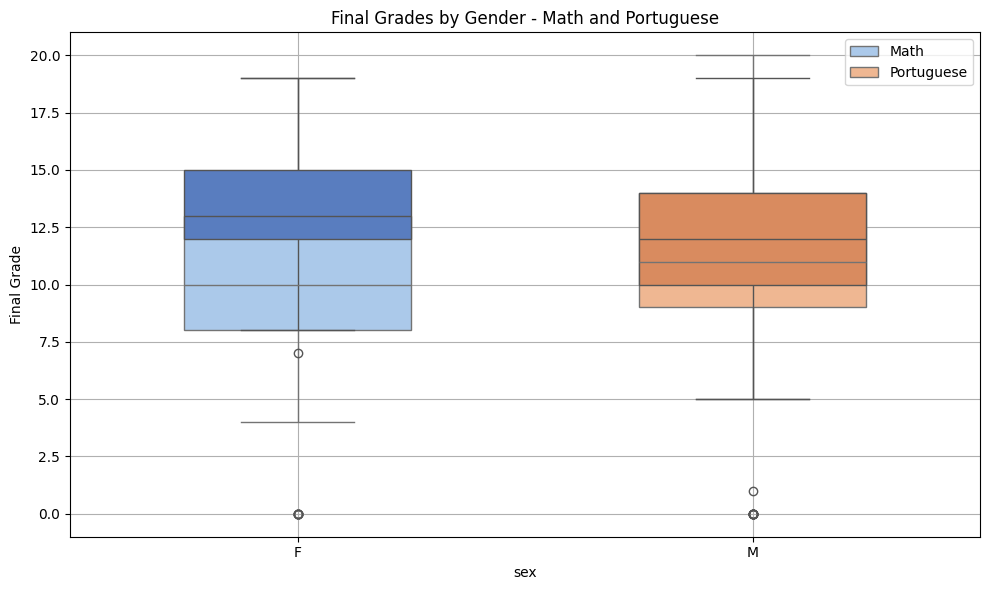

In [62]:
# Analysis by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='G3_math', data=merged_df, palette="pastel", width=0.5)
sns.boxplot(x='sex', y='G3_por', data=merged_df, palette="muted", width=0.5)
plt.title('Final Grades by Gender - Math and Portuguese')
plt.ylabel('Final Grade')
plt.grid(True)
plt.legend(["Math", "Portuguese"])
plt.tight_layout()
plt.show()

# Final grades by age

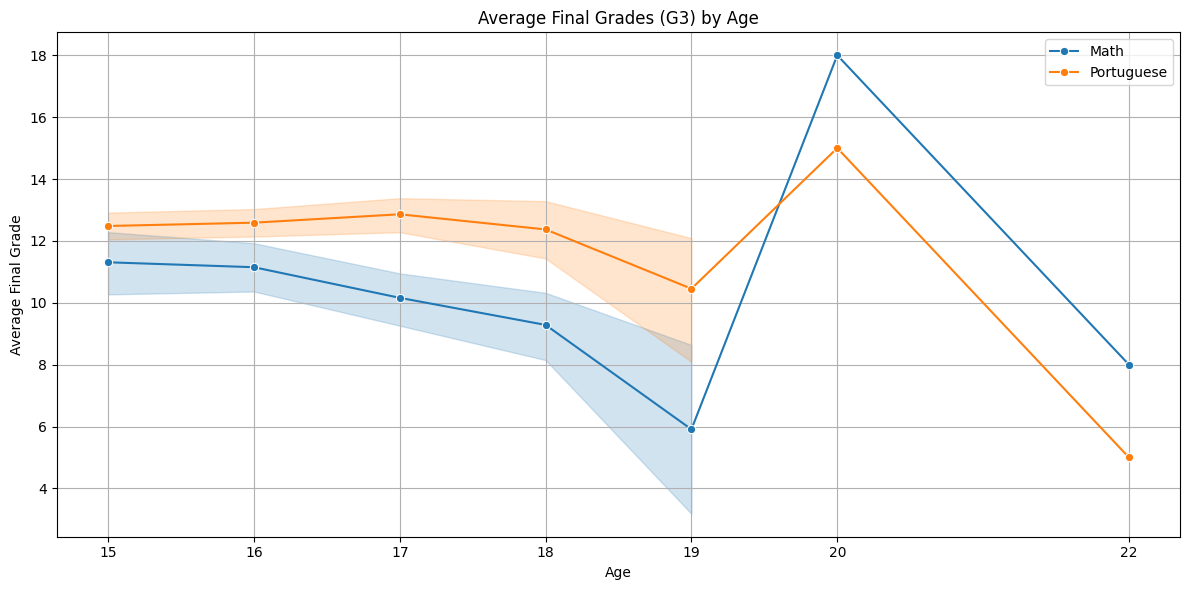

In [67]:
# Analysis by age group
age_sorted = sorted(merged_df['age'].unique())
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='G3_math', data=merged_df, label='Math', marker='o')
sns.lineplot(x='age', y='G3_por', data=merged_df, label='Portuguese', marker='o')
plt.title('Average Final Grades (G3) by Age')
plt.xlabel('Age')
plt.ylabel('Average Final Grade')
plt.xticks(age_sorted)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Grade distribution by gender

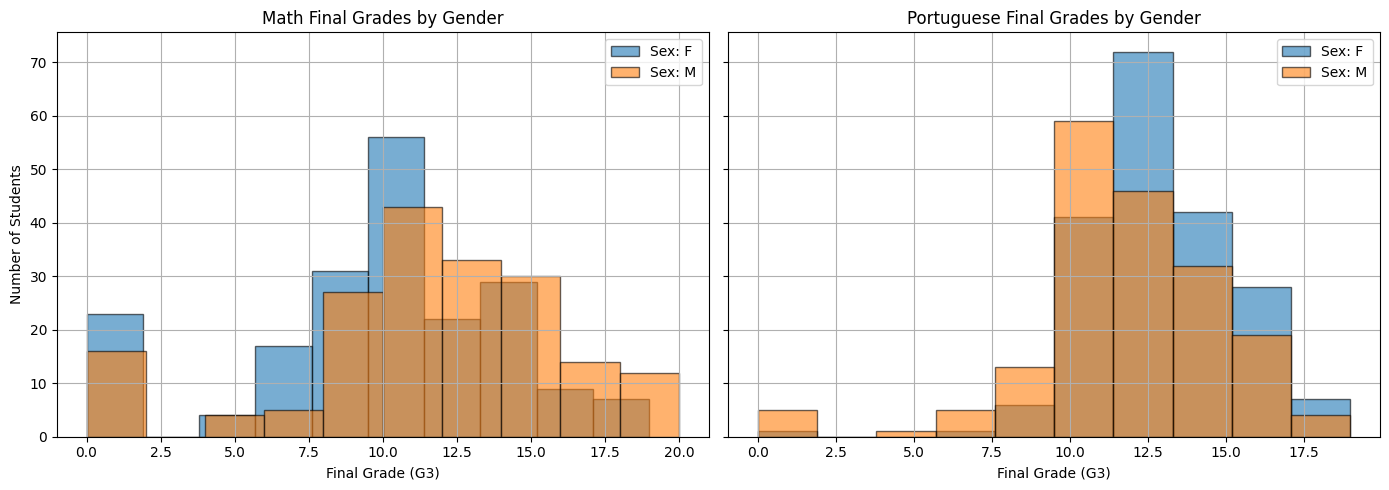

In [71]:
# Histogram by gender for Math and Portuguese grades
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Math grades by gender
for gender in merged_df['sex'].unique():
    axs[0].hist(merged_df[merged_df['sex'] == gender]['G3_math'], 
                bins=10, alpha=0.6, label=f'Sex: {gender}', edgecolor='black')
axs[0].set_title('Math Final Grades by Gender')
axs[0].set_xlabel('Final Grade (G3)')
axs[0].set_ylabel('Number of Students')
axs[0].legend()
axs[0].grid(True)

# Portuguese grades by gender
for gender in merged_df['sex'].unique():
    axs[1].hist(merged_df[merged_df['sex'] == gender]['G3_por'], 
                bins=10, alpha=0.6, label=f'Sex: {gender}', edgecolor='black')
axs[1].set_title('Portuguese Final Grades by Gender')
axs[1].set_xlabel('Final Grade (G3)')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Grade distribution by age

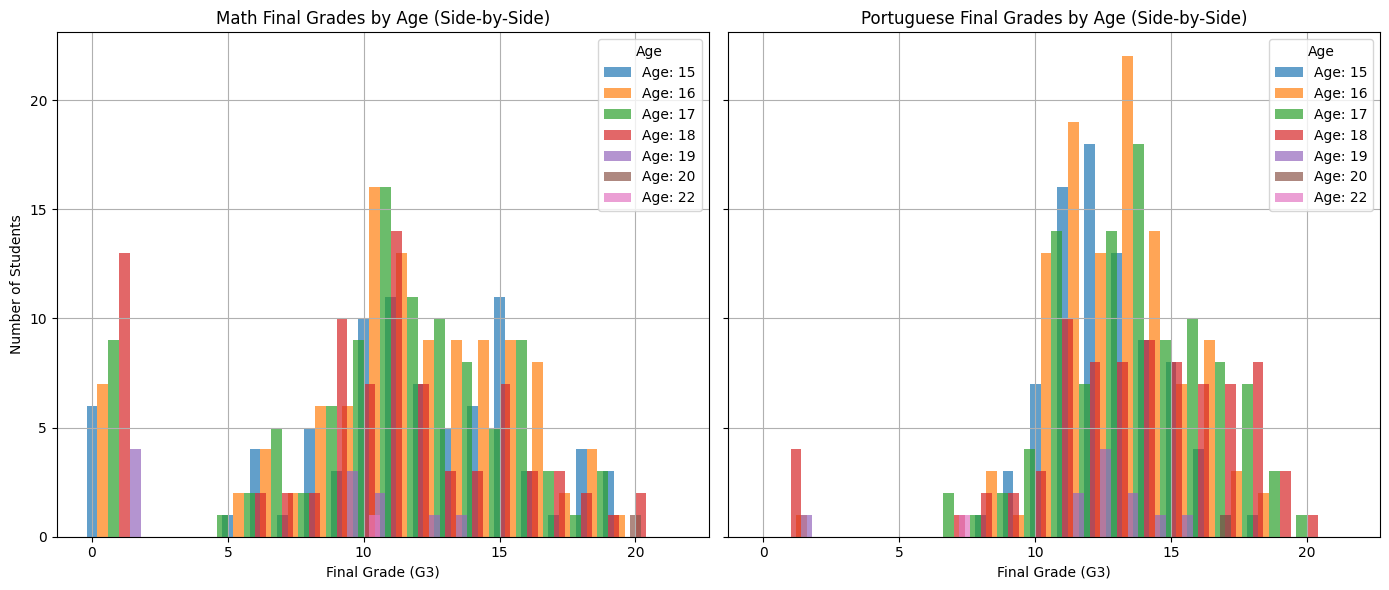

In [74]:
# Prepare histograms by age with side-by-side bars using bar charts instead of overlapping histograms
import numpy as np

# Set up figure
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Unique sorted ages
ages = sorted(merged_df['age'].unique())

# Set up bins and data
bins = np.arange(0, 21, 1)  # Grades from 0 to 20
bar_width = 0.4

# Math Grades by Age - bar chart
for i, age in enumerate(ages):
    values, _ = np.histogram(merged_df[merged_df['age'] == age]['G3_math'], bins=bins)
    axs[0].bar(bins[:-1] + i * bar_width, values, width=bar_width, label=f'Age: {age}', alpha=0.7)

axs[0].set_title('Math Final Grades by Age (Side-by-Side)')
axs[0].set_xlabel('Final Grade (G3)')
axs[0].set_ylabel('Number of Students')
axs[0].legend(title="Age")
axs[0].grid(True)

# Portuguese Grades by Age - bar chart
for i, age in enumerate(ages):
    values, _ = np.histogram(merged_df[merged_df['age'] == age]['G3_por'], bins=bins)
    axs[1].bar(bins[:-1] + i * bar_width, values, width=bar_width, label=f'Age: {age}', alpha=0.7)

axs[1].set_title('Portuguese Final Grades by Age (Side-by-Side)')
axs[1].set_xlabel('Final Grade (G3)')
axs[1].legend(title="Age")
axs[1].grid(True)

plt.tight_layout()
plt.show()


# Is there a correlation between parental education levels (Medu, Fedu) and student grades?

# Does family size or parental status (famsize, Pstatus) affect academic performance?

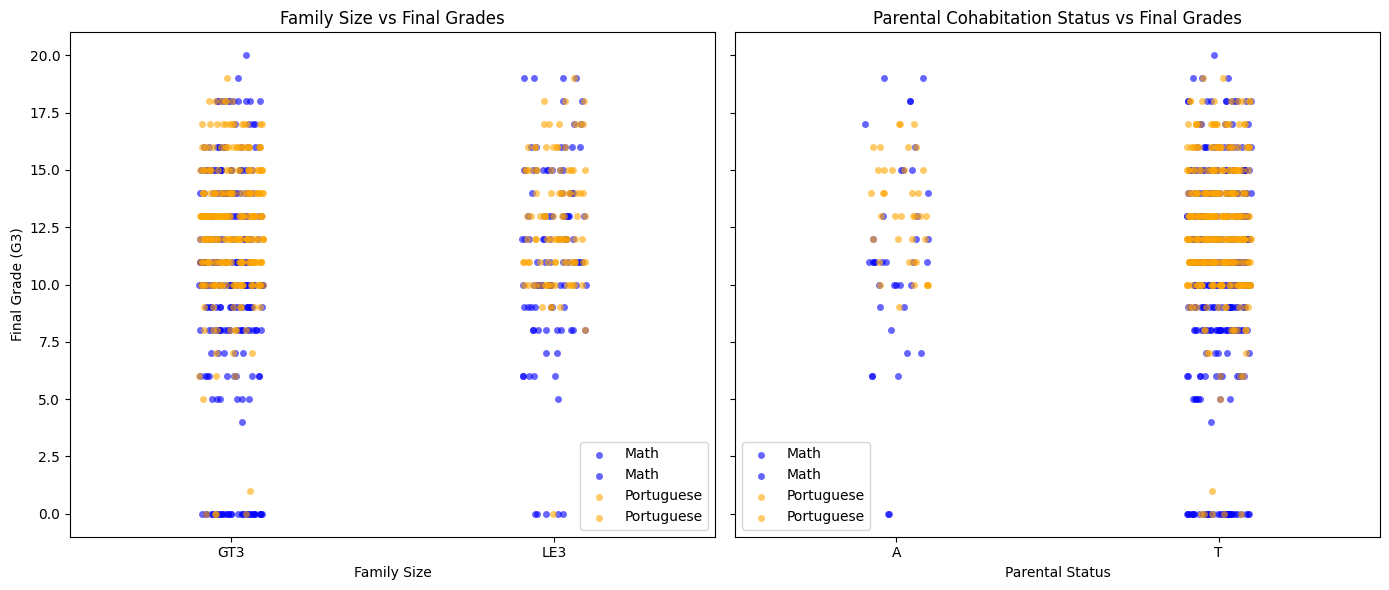

In [76]:
# Strip plots for Family Size and Parental Status vs Final Grades
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Strip plot for family size
sns.stripplot(x='famsize', y='G3_math', data=merged_df, ax=axs[0], jitter=True, alpha=0.6, color='blue', label='Math')
sns.stripplot(x='famsize', y='G3_por', data=merged_df, ax=axs[0], jitter=True, alpha=0.6, color='orange', label='Portuguese')
axs[0].set_title('Family Size vs Final Grades')
axs[0].set_xlabel('Family Size')
axs[0].set_ylabel('Final Grade (G3)')
axs[0].legend()

# Strip plot for parental status
sns.stripplot(x='Pstatus', y='G3_math', data=merged_df, ax=axs[1], jitter=True, alpha=0.6, color='blue', label='Math')
sns.stripplot(x='Pstatus', y='G3_por', data=merged_df, ax=axs[1], jitter=True, alpha=0.6, color='orange', label='Portuguese')
axs[1].set_title('Parental Cohabitation Status vs Final Grades')
axs[1].set_xlabel('Parental Status')
axs[1].set_ylabel('Final Grade (G3)')
axs[1].legend()

plt.tight_layout()
plt.show()


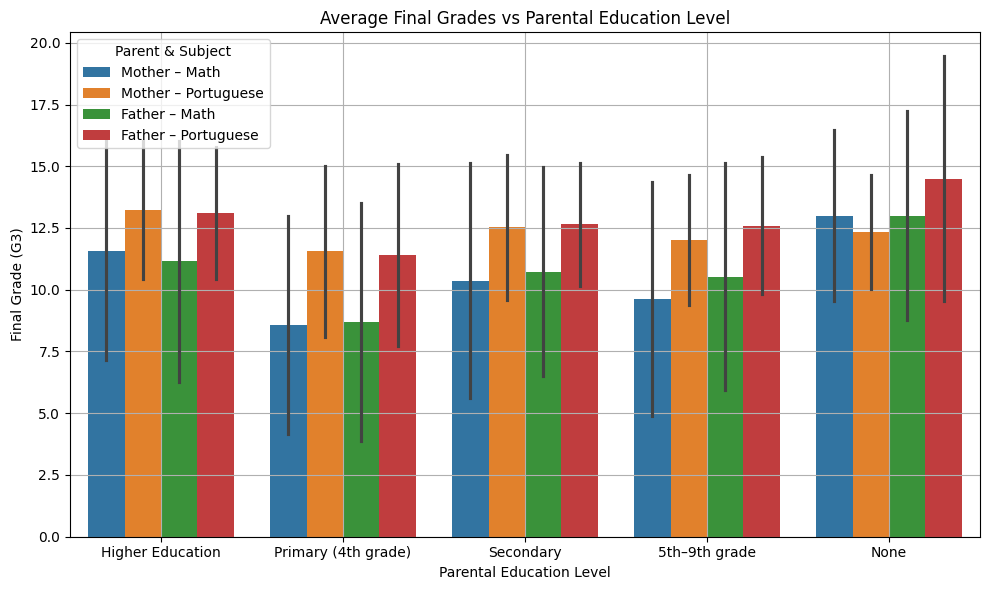

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Map labels again to ensure consistent readable categories for Medu and Fedu
edu_labels = {
    0: 'None',
    1: 'Primary (4th grade)',
    2: '5th–9th grade',
    3: 'Secondary',
    4: 'Higher Education'
}

merged_df['Medu_label'] = merged_df['Medu'].map(edu_labels)
merged_df['Fedu_label'] = merged_df['Fedu'].map(edu_labels)

# Reshape the data to long format for easier plotting
medu_data = merged_df[['Medu_label', 'G3_math', 'G3_por']].copy()
medu_data['Parent'] = 'Mother'
medu_data = medu_data.rename(columns={'Medu_label': 'Education'})

fedu_data = merged_df[['Fedu_label', 'G3_math', 'G3_por']].copy()
fedu_data['Parent'] = 'Father'
fedu_data = fedu_data.rename(columns={'Fedu_label': 'Education'})

long_df = pd.concat([medu_data, fedu_data])

# Melt the DataFrame to combine math and Portuguese grades in one column
long_df = pd.melt(long_df, id_vars=['Education', 'Parent'], 
                  value_vars=['G3_math', 'G3_por'], 
                  var_name='Subject', value_name='Grade')

# Clean up the subject names
long_df['Subject'] = long_df['Subject'].map({
    'G3_math': 'Math',
    'G3_por': 'Portuguese'
})

# Create a combined legend label
long_df['Legend'] = long_df['Parent'] + ' – ' + long_df['Subject']

# Set up the figure
plt.figure(figsize=(10, 6))

# Define legend order
hue_order = ['Mother – Math', 'Mother – Portuguese', 'Father – Math', 'Father – Portuguese']

# Plot the grouped bar chart
sns.barplot(data=long_df, x='Education', y='Grade', hue='Legend', ci='sd', hue_order=hue_order)

plt.title('Average Final Grades vs Parental Education Level')
plt.ylabel('Final Grade (G3)')
plt.xlabel('Parental Education Level')
plt.legend(title='Parent & Subject', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
